In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

통화량 및 부채수준이 부동산 가격에 미치는 영향
통화량: 나라안에서 실제로 쓰고 있는 돈의 양.

통화증가율_과_인플레이션율.xlsx :
-전년 동월 대비 기준
-출처: ECOS, 통계청
-각 컬럼의 의미: 1.M2(통화) 증가율(전년 동월 대비), 2.소비자 물가(인플레이션) 상승율(전년 동월 대비)

In [65]:
loan = pd.read_csv('../EDA_Prj/DATASET/AVENGERS_DATA/전처리_서울시_가계대출규모.csv')
m2inlation = pd.read_excel('../EDA_Prj/DATASET/AVENGERS_DATA/통화증가율_과_인플레이션율.xlsx')
mhp = pd.read_csv('../EDA_Prj/DATASET/월간주택가격동향.csv')
loan
m2inlation
mhp

,기준연도,기준월,매매상승률,매매지수,전세상승률,전세지수,월세상승률,월세지수
0,2024,3,-0.12%,95.8,0.05%,92.6,0.09%,102.0
1,2024,2,-0.14%,95.9,0.03%,92.6,0.10%,101.9
2,2024,1,-0.14%,96.0,0.05%,92.5,0.07%,101.8
3,2023,12,-0.10%,96.2,0.12%,92.5,0.10%,101.7
4,2023,11,0.04%,96.3,0.27%,92.4,0.14%,101.6
...,...,...,...,...,...,...,...,...
70,2018,5,-0.03%,90.1,-0.28%,94.8,-0.12%,99.5
71,2018,4,0.06%,90.1,-0.19%,95.1,-0.10%,99.6
72,2018,3,0.12%,90.1,-0.13%,95.2,-0.07%,99.7
73,2018,2,0.20%,90.0,-0.09%,95.4,-0.05%,99.7


In [66]:
loan, m2inlation, mhp

(    Unnamed: 0    예금취급기관      예금은행  비은행예금취급기관        합계  기준년도  기준월  지역
 0            0  408773.7  350423.8    58349.9  817547.4  2022   12  서울
 1            1  411123.9  352212.1    58911.8  822247.8  2022   11  서울
 2            2  412196.5  353154.8    59041.7  824393.0  2022   10  서울
 3            3  412258.7  353379.7    58879.0  824517.4  2022    9  서울
 4            4  412379.4  353680.2    58699.2  824758.8  2022    8  서울
 5            5  412114.2  353800.7    58313.5  824228.4  2022    7  서울
 6            6  412325.9  354282.0    58043.9  824651.8  2022    6  서울
 7            7  411590.1  353971.6    57618.5  823180.2  2022    5  서울
 8            8  410774.4  353689.7    57084.7  821548.8  2022    4  서울
 9            9  409706.5  352801.2    56905.3  819413.0  2022    3  서울
 10          10  410414.3  353496.4    56917.9  820828.6  2022    2  서울
 11          11  406480.6  349757.8    56722.8  812961.2  2022    1  서울
 12          12  406570.8  349914.7    56656.1  813141.6  2021  

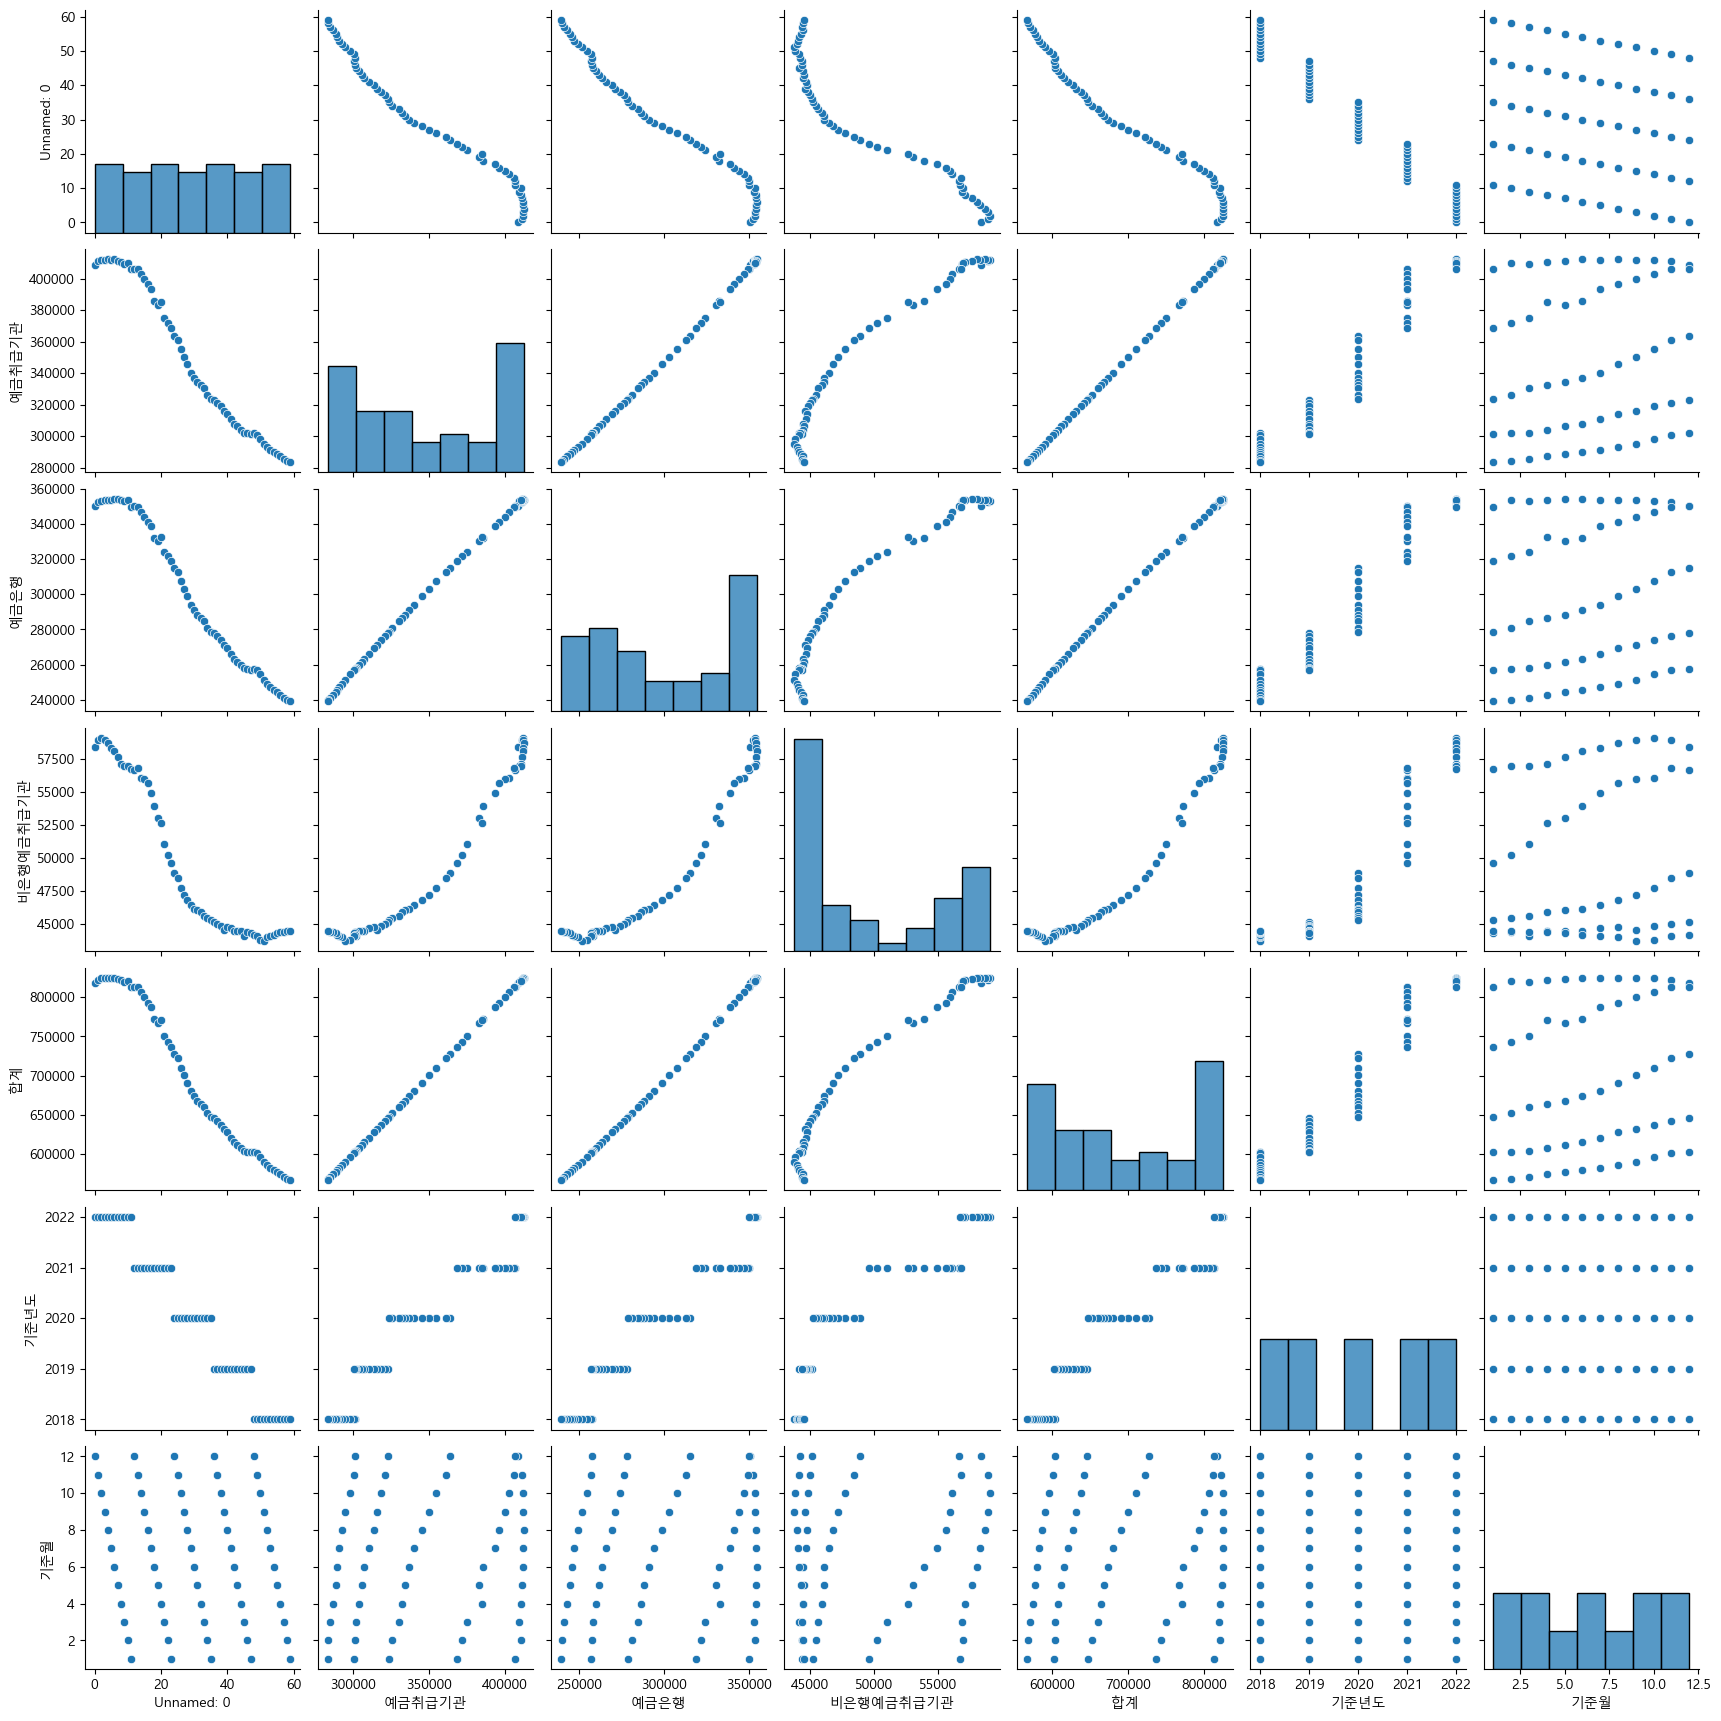

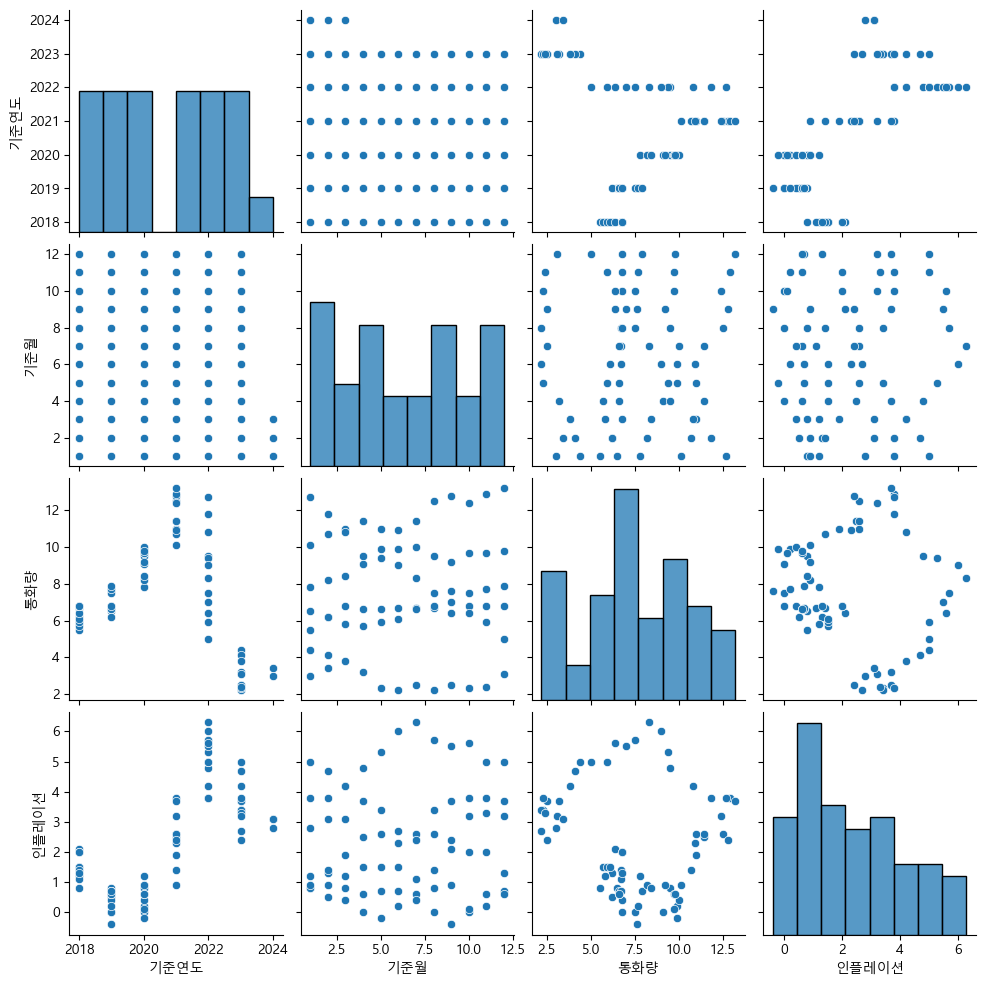

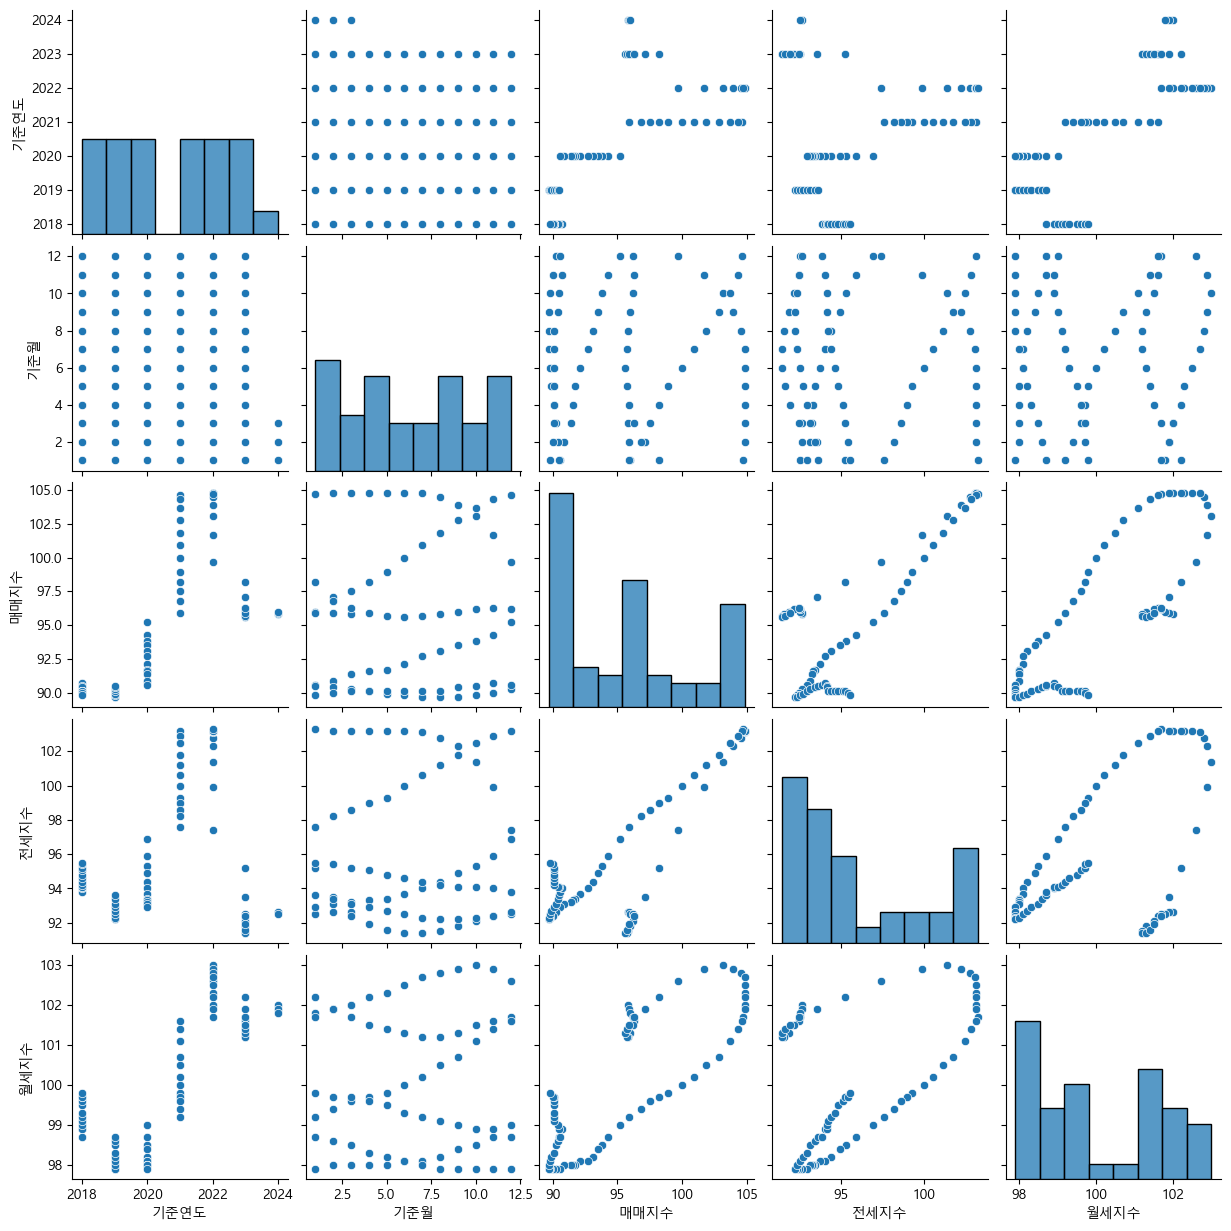

In [67]:
sns.pairplot(loan)
sns.pairplot(m2inlation)
sns.pairplot(mhp)

In [68]:
loan.columns

Index(['Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관', '합계', '기준년도', '기준월', '지역'], dtype='object')

In [69]:
m2inlation.columns

Index(['기준연도', '기준월', '통화량', '인플레이션'], dtype='object')

In [70]:
mhp.columns

Index(['기준연도', '기준월', '매매상승률', '매매지수', '전세상승률', '전세지수', '월세상승률', '월세지수'], dtype='object')

C:\Users\cchok\AppData\Local\Temp\ipykernel_23220\1384913088.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = analysis_data.corr()


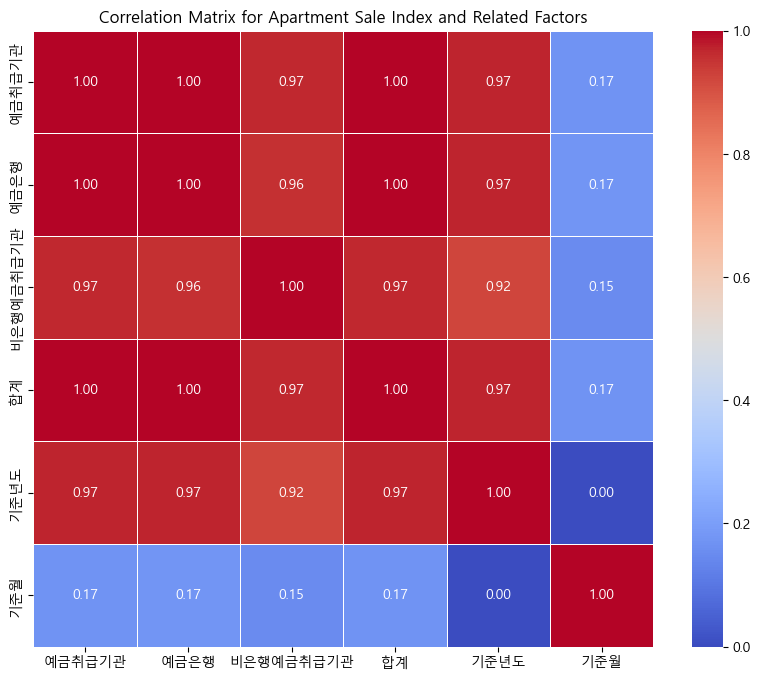

In [71]:

# Selecting relevant columns for analysis
relevant_columns = ['예금취급기관', '예금은행', '비은행예금취급기관', '합계', '기준년도', '기준월', '지역']
analysis_data = loan[relevant_columns]

# Calculating correlation matrix
correlation_matrix = analysis_data.corr()

# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Apartment Sale Index and Related Factors')
plt.show()

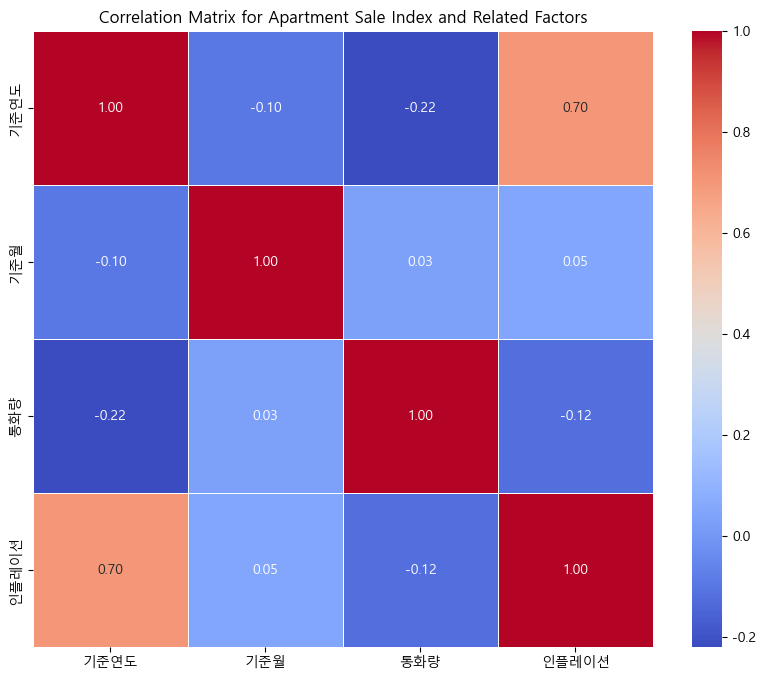

In [72]:

# Selecting relevant columns for analysis
relevant_columns = ['기준연도', '기준월', '통화량', '인플레이션']
analysis_data = m2inlation[relevant_columns]

# Calculating correlation matrix
correlation_matrix = analysis_data.corr()

# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Apartment Sale Index and Related Factors')
plt.show()

C:\Users\cchok\AppData\Local\Temp\ipykernel_23220\1817363360.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = analysis_data.corr()


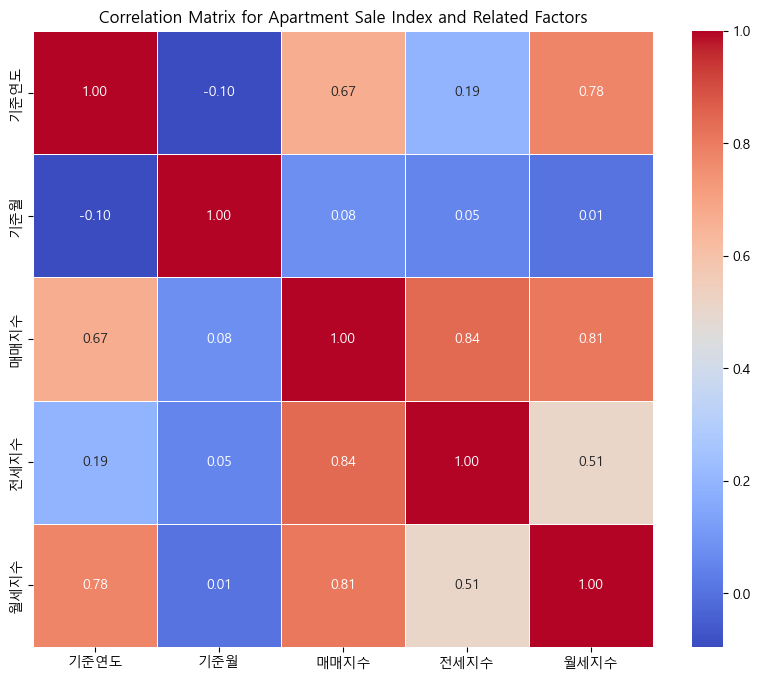

In [73]:

# Selecting relevant columns for analysis
relevant_columns = ['기준연도', '기준월', '매매상승률', '매매지수', '전세상승률', '전세지수', '월세상승률', '월세지수']
analysis_data = mhp[relevant_columns]

# Calculating correlation matrix
correlation_matrix = analysis_data.corr()

# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Apartment Sale Index and Related Factors')
plt.show()

c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.tight_layout()
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.tight_layout()
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


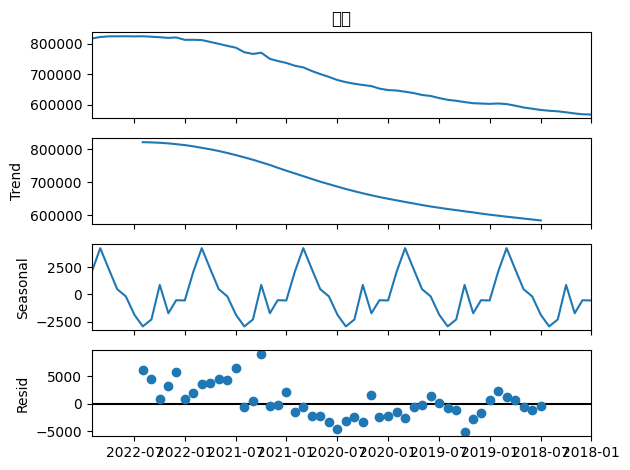

In [6]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 주어진 데이터
data = {
    '예금취급기관': [408773.7, 411123.9, 412196.5, 412258.7, 412379.4, 412114.2, 412325.9, 411590.1, 410774.4, 409706.5, 410414.3, 406480.6, 406570.8, 406120.7, 402983.9, 399927.9, 396530.1, 393503.4, 386051.3, 383313.8, 385299.8, 375179.8, 371717.3, 368505.5, 363817.0, 361190.4, 355160.8, 350203.9, 345570.0, 340297.2, 336897.1, 334236.2, 332221.8, 330397.8, 326252.6, 323866.6, 323097.2, 321228.2, 318900.5, 315819.7, 314138.1, 310648.3, 307850.9, 306218.9, 304106.8, 302256.6, 301725.2, 301208.6, 301803.2, 300850.4, 298189.6, 295266.1, 293203.6, 291201.8, 289868.6, 288940.0, 287303.5, 285382.6, 284094.8, 283669.8],
    '예금은행': [350423.8, 352212.1, 353154.8, 353379.7, 353680.2, 353800.7, 354282.0, 353971.6, 353689.7, 352801.2, 353496.4, 349757.8, 349914.7, 349359.1, 346925.1, 343981.5, 340884.3, 338603.0, 332139.4, 330308.3, 332640.9, 324146.7, 321493.4, 318912.2, 314963.4, 312736.3, 307478.0, 303023.1, 298771.6, 293846.6, 290795.0, 288171.8, 286316.8, 284821.7, 280797.6, 278623.0, 277978.7, 276243.6, 274102.3, 271268.1, 269423.7, 265963.2, 263417.0, 261748.6, 259680.8, 258154.6, 257365.0, 256885.8, 257626.8, 256775.7, 254393.4, 251547.8, 249245.6, 247169.5, 245744.6, 244660.4, 242900.6, 241036.3, 239632.9, 239190.4],
    '비은행예금취급기관': [58349.9, 58911.8, 59041.7, 58879.0, 58699.2, 58313.5, 58043.9, 57618.5, 57084.7, 56905.3, 56917.9, 56722.8, 56656.1, 56761.5, 56058.8, 55946.5, 55645.8, 54900.4, 53911.9, 53005.4, 52658.9, 51033.1, 50223.9, 49593.3, 48853.5, 48454.1, 47682.8, 47180.8, 46798.4, 46450.6, 46102.1, 46064.4, 45905.0, 45576.1, 45455.0, 45243.6, 45118.5, 44984.6, 44798.3, 44551.5, 44714.3, 44685.1, 44433.9, 44470.3, 44426.0, 44102.0, 44360.2, 44322.8, 44176.4, 44074.7, 43796.2, 43718.3, 43958.0, 44032.3, 44124.0, 44279.6, 44402.9, 44346.4, 44461.9, 44479.4],
    '합계': [817547.4, 822247.8, 824393.0, 824517.4, 824758.8, 824228.4, 824651.8, 823180.2, 821548.8, 819413.0, 820828.6, 812961.2, 813141.6, 812241.3, 805967.8, 799855.9, 793060.2, 787006.8, 772102.6, 766627.5, 770599.6, 750359.6, 743434.6, 737011.0, 727633.9, 722380.8, 710321.6, 700407.8, 691140.0, 680594.4, 673794.2, 668472.4, 664443.6, 660795.6, 652505.2, 647733.2, 646194.4, 642456.4, 637801.1, 631639.3, 628276.1, 621296.6, 615701.8, 612437.8, 608213.6, 604513.2, 603450.4, 602417.2, 603606.4, 601700.8, 596379.2, 590532.2, 586407.2, 582403.6, 579737.2, 577880.0, 574607.0, 570765.3, 568189.6, 567339.6],
    '기준년도': [2022]*12 + [2021]*12 + [2020]*12 + [2019]*12 + [2018]*12,
    '기준월': [i for i in range(12, 0, -1)]*5,
    '지역': ['서울']*60
}

# 데이터프레임 생성
loan = pd.DataFrame(data)

# '기준년도'와 '기준월'을 조합하여 DatetimeIndex 생성
loan['날짜'] = pd.to_datetime(loan['기준년도'].astype(str) + '-' + loan['기준월'].astype(str), format='%Y-%m')

# '날짜'를 인덱스로 설정
loan.set_index('날짜', inplace=True)

# 시계열 분해
result = seasonal_decompose(loan['합계'], model='additive', period=12)

# 시각화
decomposition_fig = result.plot()
plt.show()


### 년도에 따른 대출규모 시각화
시계열 분해는 시계열 데이터를 세 가지 주요 구성 요소인 계절성(seasonality), 추세(trend), 그리고 잔차(residuals)로 분해하는 통계적 기법.
이 코드는 시계열 데이터를 분석하여 각 구성 요소를 시각적으로 표시하여 데이터의 특성을 파악하는 통계적 기법을 사용.

### 추세(Trend): 
시간에 따른 데이터의 장기적인 경향을 보여줍니다. 추세선은 매매지수의 전반적인 상승 또는 하락 추세를 나타냅니다.
### 계절성(Seasonal): 
특정 시간 구간(예: 월별, 분기별) 내에서 반복되는 패턴을 보여줍니다. 계절성 요소는 일정한 주기를 가지고 반복되는 변동을 나타내며, 부동산 시장의 계절적 변동을 반영할 수 있습니다.
### 잔차(Residual): 
추세와 계절성을 제거한 후 남는 변동성을 나타내며, 이는 모델에서 설명되지 않는 노이즈나 다른 영향들을 포함합니다.

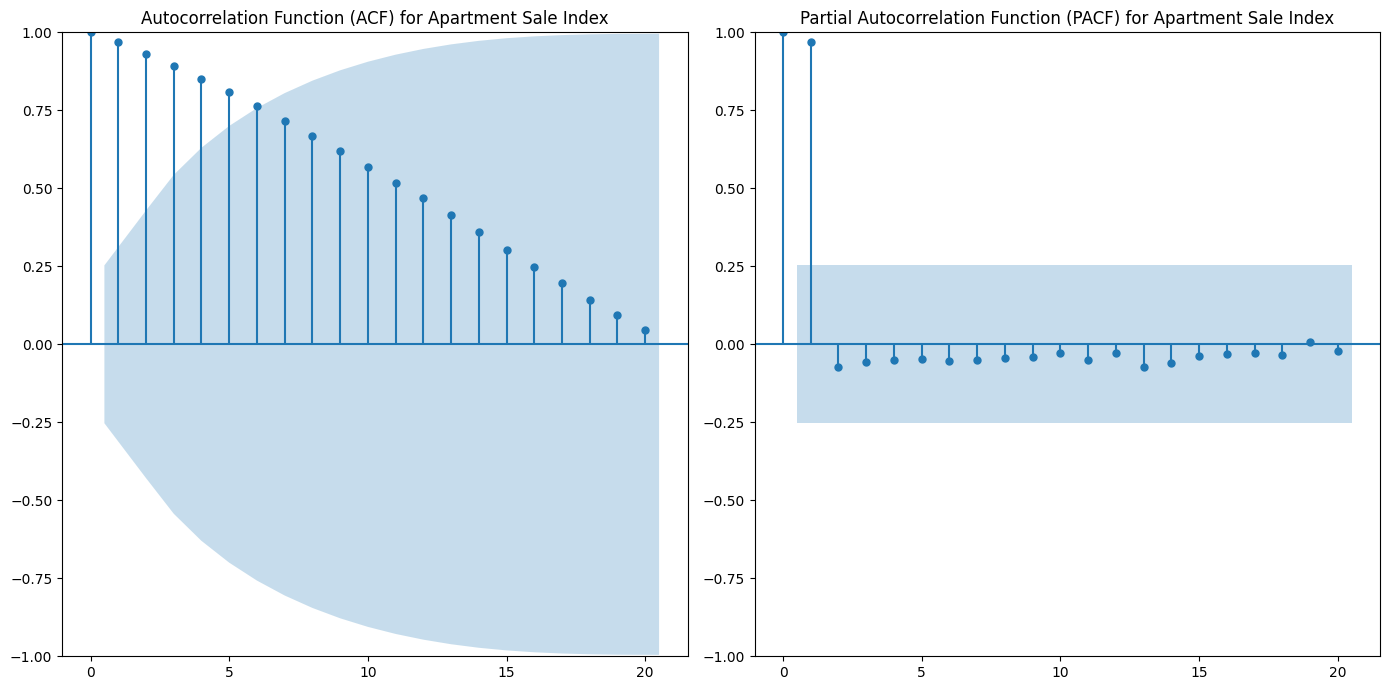

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(14, 7))

plt.subplot(121)
plot_acf(loan['합계'], ax=plt.gca(), lags=20, title='Autocorrelation Function (ACF) for Apartment Sale Index')

plt.subplot(122)
plot_pacf(loan['합계'], ax=plt.gca(), lags=20, title='Partial Autocorrelation Function (PACF) for Apartment Sale Index')

plt.tight_layout()
plt.show()

### ACF(자기 상관 함수),데이터 간의 시간적 관련성 과  PACF(부분 자기 상관 함수),시차의 영향을 배제한 자기 상관을 통해 적합한 시계열 모델을 선택하거나 파악 할 수 있다.


### 자기상관 함수 (ACF): 
자기상관 함수 (ACF): 시계열 데이터 내의 현재 값과 과거 값들 사이의 선형 관계를 측정합니다. 이는 시차에 따른 데이터 포인트 간의 상관 관계를 나타냅니다.
초기 몇 개의 시차에서 상당한 양의 상관관계를 보여주고 있습니다. 이는 매매지수가 이전 시간대의 값에 영향을 받고 있음을 나타냅니다. 시차가 증가함에 따라 상관관계는 점차 감소합니다.
### 부분 자기상관 함수 (PACF): 
부분 자기상관 함수 (PACF): 특정 시차를 제외한 다른 모든 시차의 영향을 제거한 후의 상관 관계를 측정합니다. 이는 각 시차가 추가적으로 제공하는 정보의 양을 나타냅니다.
첫 번째와 두 번째 시차에서의 뚜렷한 급격한 감소를 보이고 있으며, 이후에는 상관관계가 유의미하게 낮아집니다. 이는 첫 번째 또는 두 번째 시차 이후의 값들이 매매지수 예측에 중요한 정보를 덜 제공함을 의미합니다.

c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
c:\Users\cchok\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\U

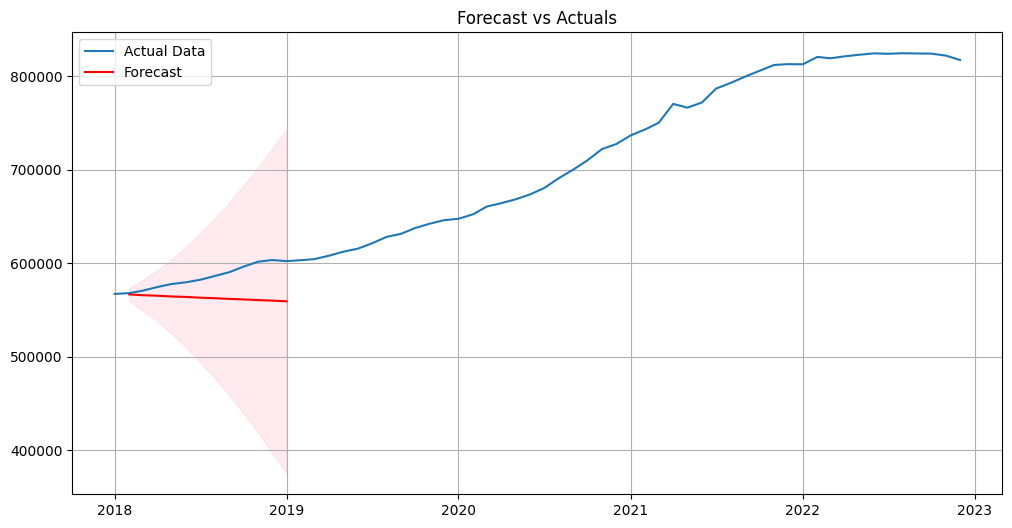

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# 주어진 데이터
data = {
    '예금취급기관': [408773.7, 411123.9, 412196.5, 412258.7, 412379.4, 412114.2, 412325.9, 411590.1, 410774.4, 409706.5, 410414.3, 406480.6, 406570.8, 406120.7, 402983.9, 399927.9, 396530.1, 393503.4, 386051.3, 383313.8, 385299.8, 375179.8, 371717.3, 368505.5, 363817.0, 361190.4, 355160.8, 350203.9, 345570.0, 340297.2, 336897.1, 334236.2, 332221.8, 330397.8, 326252.6, 323866.6, 323097.2, 321228.2, 318900.5, 315819.7, 314138.1, 310648.3, 307850.9, 306218.9, 304106.8, 302256.6, 301725.2, 301208.6, 301803.2, 300850.4, 298189.6, 295266.1, 293203.6, 291201.8, 289868.6, 288940.0, 287303.5, 285382.6, 284094.8, 283669.8],
    '예금은행': [350423.8, 352212.1, 353154.8, 353379.7, 353680.2, 353800.7, 354282.0, 353971.6, 353689.7, 352801.2, 353496.4, 349757.8, 349914.7, 349359.1, 346925.1, 343981.5, 340884.3, 338603.0, 332139.4, 330308.3, 332640.9, 324146.7, 321493.4, 318912.2, 314963.4, 312736.3, 307478.0, 303023.1, 298771.6, 293846.6, 290795.0, 288171.8, 286316.8, 284821.7, 280797.6, 278623.0, 277978.7, 276243.6, 274102.3, 271268.1, 269423.7, 265963.2, 263417.0, 261748.6, 259680.8, 258154.6, 257365.0, 256885.8, 257626.8, 256775.7, 254393.4, 251547.8, 249245.6, 247169.5, 245744.6, 244660.4, 242900.6, 241036.3, 239632.9, 239190.4],
    '비은행예금취급기관': [58349.9, 58911.8, 59041.7, 58879.0, 58699.2, 58313.5, 58043.9, 57618.5, 57084.7, 56905.3, 56917.9, 56722.8, 56656.1, 56761.5, 56058.8, 55946.5, 55645.8, 54900.4, 53911.9, 53005.4, 52658.9, 51033.1, 50223.9, 49593.3, 48853.5, 48454.1, 47682.8, 47180.8, 46798.4, 46450.6, 46102.1, 46064.4, 45905.0, 45576.1, 45455.0, 45243.6, 45118.5, 44984.6, 44798.3, 44551.5, 44714.3, 44685.1, 44433.9, 44470.3, 44426.0, 44102.0, 44360.2, 44322.8, 44176.4, 44074.7, 43796.2, 43718.3, 43958.0, 44032.3, 44124.0, 44279.6, 44402.9, 44346.4, 44461.9, 44479.4],
    '합계': [817547.4, 822247.8, 824393.0, 824517.4, 824758.8, 824228.4, 824651.8, 823180.2, 821548.8, 819413.0, 820828.6, 812961.2, 813141.6, 812241.3, 805967.8, 799855.9, 793060.2, 787006.8, 772102.6, 766627.5, 770599.6, 750359.6, 743434.6, 737011.0, 727633.9, 722380.8, 710321.6, 700407.8, 691140.0, 680594.4, 673794.2, 668472.4, 664443.6, 660795.6, 652505.2, 647733.2, 646194.4, 642456.4, 637801.1, 631639.3, 628276.1, 621296.6, 615701.8, 612437.8, 608213.6, 604513.2, 603450.4, 602417.2, 603606.4, 601700.8, 596379.2, 590532.2, 586407.2, 582403.6, 579737.2, 577880.0, 574607.0, 570765.3, 568189.6, 567339.6],
    '기준년도': [2022]*12 + [2021]*12 + [2020]*12 + [2019]*12 + [2018]*12,
    '기준월': [i for i in range(12, 0, -1)]*5,
    '지역': ['서울']*60
}

# 데이터프레임 생성
loan = pd.DataFrame(data)

# '기준년도'와 '기준월'을 조합하여 DatetimeIndex 생성
loan['날짜'] = pd.to_datetime(loan['기준년도'].astype(str) + '-' + loan['기준월'].astype(str), format='%Y-%m')

# '날짜'를 인덱스로 설정
loan.set_index('날짜', inplace=True)

# Applying first difference to the data
data_diff = loan['합계'].diff().dropna()

# Perform ADF test on the first differenced data
adf_test_diff = adfuller(data_diff)

# Display the ADF test results for the differenced data
adf_test_diff_result = {
    'Test Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Critical Values': adf_test_diff[4],
}

adf_test_diff_result

# Applying second difference to the data
data_diff_2 = data_diff.diff().dropna()

# Perform ADF test on the second differenced data
adf_test_diff_2 = adfuller(data_diff_2)

# Display the ADF test results for the second differenced data
adf_test_diff_2_result = {
    'Test Statistic': adf_test_diff_2[0],
    'p-value': adf_test_diff_2[1],
    'Critical Values': adf_test_diff_2[4],
}

adf_test_diff_2_result

# Building the ARIMA model with p=2, d=2, q=2
arima_model = ARIMA(loan['합계'], order=(2, 2, 2))
arima_result = arima_model.fit()

# Forecasting the next 12 months using the ARIMA model
forecast_steps = 12
forecast_result = arima_result.get_forecast(steps=forecast_steps)

# Extracting forecast mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Ensure the forecast index and data index have proper datetime types for plotting
forecast_index = pd.date_range(start=loan.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_mean.index = forecast_index
forecast_conf_int.index = forecast_index

# Verify if there are any NaNs or infinite values in the forecast confidence intervals
invalid_data_check = forecast_conf_int.isna().any().any() or not np.isfinite(forecast_conf_int.values).all()

# If there are no invalid data issues, try plotting again
if not invalid_data_check:
    plt.figure(figsize=(12, 6))
    plt.plot(loan.index, loan['합계'], label='Actual Data')
    plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
    plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title('Forecast vs Actuals')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Invalid data detected in forecast confidence intervals.")


### 주어진 시계열 데이터에 대해 ARIMA 모델을 사용하여 다음 12개월의 예측을 생성하고, 이를 시각화하는 작업

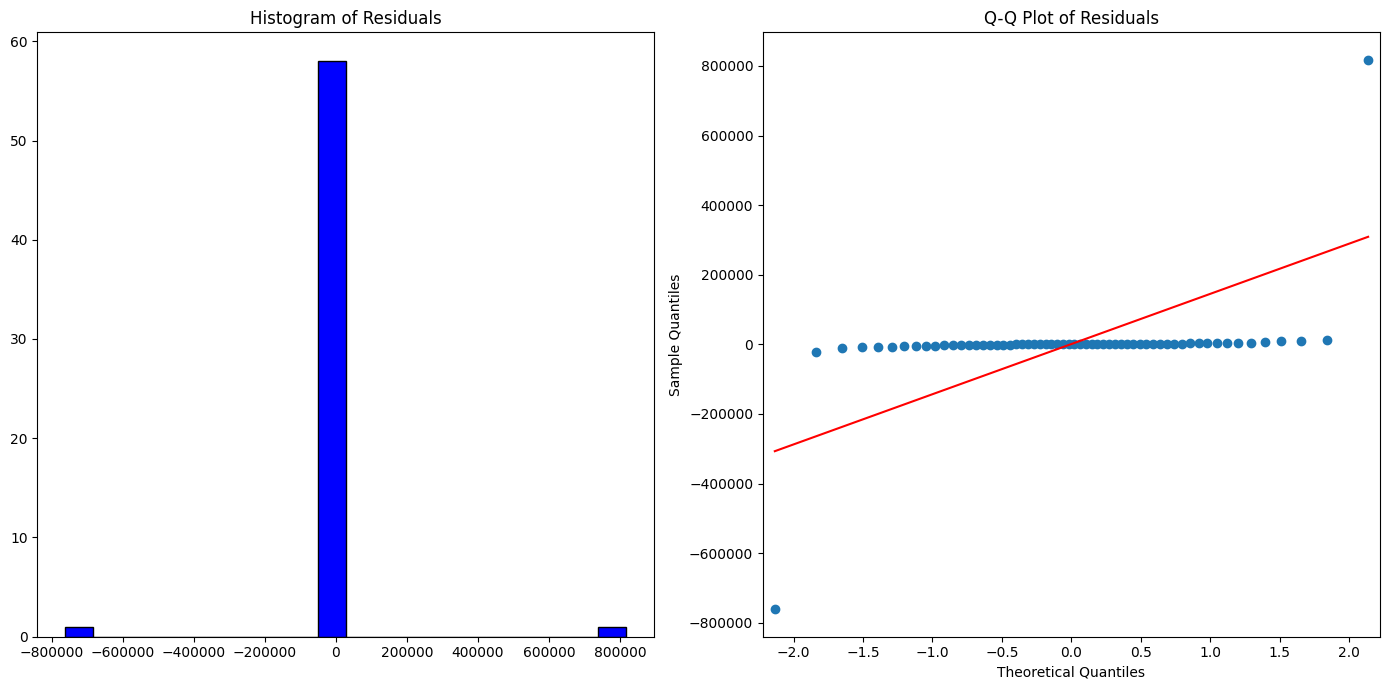

ShapiroResult(statistic=0.24096843089809084, pvalue=5.371985544594528e-16)

In [21]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Extract residuals
residuals = arima_result.resid

# Plot histogram and QQ-plot of the residuals
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')

plt.subplot(122)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
shapiro_test

### ARIMA 모델의 잔차(residuals)를 히스토그램과 Q-Q 플롯으로 시각화하고, 잔차가 정규 분포를 따르는지 확인하기 위해 샤피로-윌크(Shapiro-Wilk) 정규성 검정을 수행

### 결과는 샤피로-윌크 검정의 통계량과 p-value로 제공됩니다. 유의수준 0.05에서 p-value가 작으면 잔차가 정규 분포를 따르지 않는 것으로 해석될 수 있습니다.

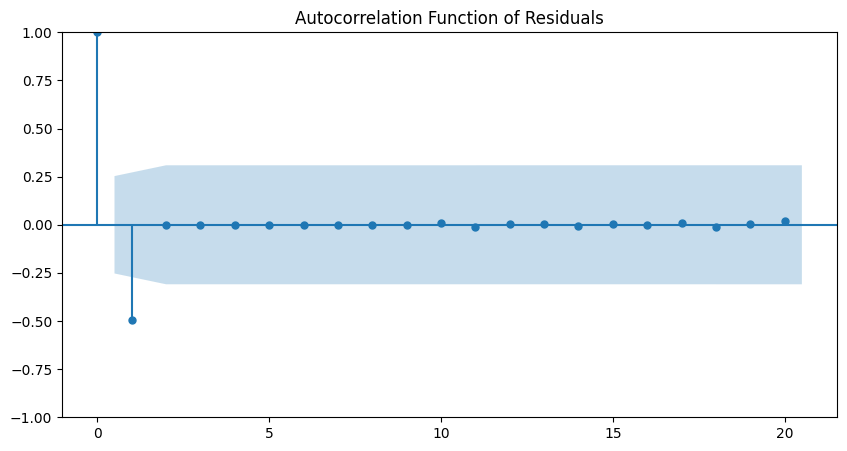

In [22]:
# Plotting the Autocorrelation Function (ACF) for residuals
plt.figure(figsize=(10, 5))
plot_acf(residuals, ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function of Residuals')
plt.show()

### ARIMA 모델의 잔차에 대한 자기상관 함수(Autocorrelation Function, ACF)를 시각화

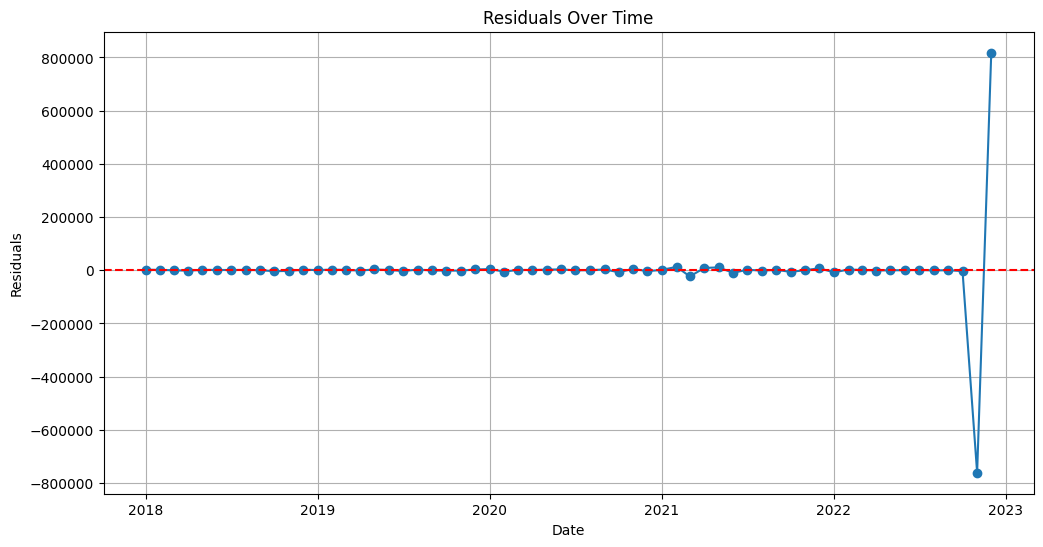

In [23]:
# Plot residuals over time with a line at zero for reference
plt.figure(figsize=(12, 6))
plt.plot(residuals.index, residuals, label='Residuals', marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### 잔차를 시간에 따른 추세와 함께 그래프로 시각화

C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cchok\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI})

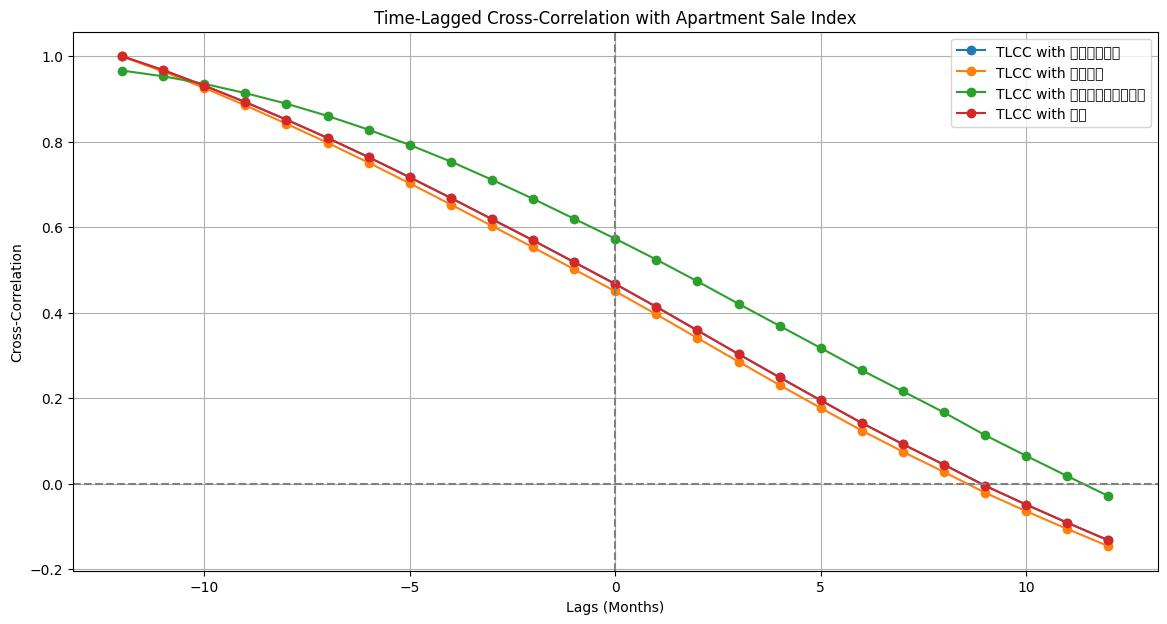

In [24]:
from statsmodels.tsa.stattools import ccf

# Selecting relevant columns for TLCC
columns = ['예금취급기관','예금은행','비은행예금취급기관','합계']
lags = range(-12, 13)  # Lags from -12 to 12 months

# Computing Time-Lagged Cross-Correlation for each variable with the Sale Index
tlcc_results = {col: ccf(data['합계'], data[col], adjusted=False)[:len(lags)] for col in columns}

# Plotting TLCC results
plt.figure(figsize=(14, 7))
for col, values in tlcc_results.items():
    plt.plot(lags, values, marker='o', label=f'TLCC with {col}')

plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Time-Lagged Cross-Correlation with Apartment Sale Index')
plt.xlabel('Lags (Months)')
plt.ylabel('Cross-Correlation')
plt.legend()
plt.grid(True)
plt.show()

 ### 주어진 데이터와 아파트 판매 지수 간의 시간 지연 교차 상관 관계(Time-Lagged Cross-Correlation, TLCC)를 계산하고 시각화